In [2]:
import bldw
import glob
import numpy as np
import blimpy as bl
import matplotlib.pyplot as plt
import pandas as pd
import setigen
import os
import turbo_seti
%matplotlib inline

import turbo_seti.find_doppler.seti_event as turbo
import turbo_seti.find_event as find
from turbo_seti.find_doppler.find_doppler import FindDoppler
from turbo_seti.find_event.find_event_pipeline import find_event_pipeline
from turbo_seti.find_event.plot_event_pipeline import plot_event_pipeline

numexpr.utils   INFO     Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
numexpr.utils   INFO     NumExpr defaulting to 8 threads.


In [3]:
import os
import time
from pathlib import Path
from turbo_seti.find_doppler.find_doppler import FindDoppler
DATADIR = "/datax/scratch/benjb/ata_remote_observations/"
print ('DATADIR', DATADIR)

DATADIR /datax/scratch/benjb/ata_remote_observations/


In [23]:
# Get rid of any pre-existing output files from a prior run.
for x_file in sorted(os.listdir(DATADIR)):
    x_type = x_file.split('.')[-1]
    if x_type != 'fbh5':
        os.remove(DATADIR + x_file)

In [5]:
file_list = glob.glob('/datax/scratch/benjb/ata_remote_observations/*.fbh5')
print(file_list)

['/datax/scratch/benjb/ata_remote_observations/fil_60528_62453_21002929_mars_0001-beam0000.fbh5', '/datax/scratch/benjb/ata_remote_observations/fil_60528_62453_21002929_mars_0001-beam0001.fbh5']


In [6]:
# Get ready for search by instantiating the doppler object.
doppler = FindDoppler(file_list[0],
                      max_drift = 4,
                      snr = 10,
                      out_dir = DATADIR # This is where the turboSETI output files will be stored.
                     )
print("\ntutorial_1: FindDoppler object was instantiated.")


turbo_seti version 2.3.2
blimpy version 2.1.4
h5py version 2.10.0
hdf5plugin version 2.1.2
HDF5 library version 1.10.5


data_handler    INFO     From blimpy, n_coarse_chan=48

tutorial_1: FindDoppler object was instantiated.


In [7]:
#Now we run the search routine on the spectra contained in this single HDF5 file:
t1 = time.time()
doppler.search()
print("\ntutorial_1: Search complete, et = {:.1f} seconds.".format(time.time() - t1))

HDF5 header info: {'DIMENSION_LABELS': array([b'time', b'feed_id', b'frequency'], dtype=object), 'az_start': 234.47120666503906, 'barycentric': 0, 'data_type': 0, 'fch1': 8351.750000953674, 'foff': 1.9073486328125e-06, 'ibeam': 0, 'machine_id': 0, 'nbeams': 2, 'nbits': 32, 'nchans': 50331648, 'nifs': 1, 'pulsarcentric': 0, 'source_name': 'mars', 'src_dej': <Angle 21.60411952 deg>, 'src_raj': <Angle 4.64228878 hourangle>, 'telescope_id': 9, 'tsamp': 16.777216, 'tstart': 60528.72283564815, 'za_start': 28.130512237548828}

Starting ET search with parameters: datafile=/datax/scratch/benjb/ata_remote_observations/fil_60528_62453_21002929_mars_0001-beam0000.fbh5, max_drift=4, min_drift=1e-05, snr=10, out_dir=/datax/scratch/benjb/ata_remote_observations/, coarse_chans=None, flagging=False, n_coarse_chan=48, kernels=None, gpu_id=0, gpu_backend=False, blank_dc=True, precision=1, append_output=False, log_level_int=20, obs_info={'pulsar': 0, 'pulsar_found': 0, 'pulsar_dm': 0.0, 'pulsar_snr': 0.0,

TypeError: expected dtype object, got 'numpy.dtype[float32]'

In [24]:
# glob will create a list of specific files in a directory. In this case, any file ending in .h5.
h5list = sorted(glob.glob(DATADIR + '*.fbh5'))
for file in h5list:
    print(file)

# Iterate over the 6 HDF5 files
print("tutorial_1: Please wait for the \"End\" message,\n")
for file in h5list:
    # Execute turboSETI in the terminal
    console = 'turboSETI -M 12 -s 2 -o ' + DATADIR + ' -n 192 ' + file
    os.system(console)

print("\ntutorial_1: All HDF5 files have been successfully processed.")
print("tutorial_1: End.")

/datax/scratch/benjb/ata_remote_observations/fil_60528_62453_21002929_mars_0001-beam0000.fbh5
/datax/scratch/benjb/ata_remote_observations/fil_60528_62453_21002929_mars_0001-beam0001.fbh5
tutorial_1: Please wait for the "End" message,


tutorial_1: All HDF5 files have been successfully processed.
tutorial_1: End.


In [11]:
fb = bl.Waterfall(h5list[0])
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :               234.47120666503906
     barycentric :                                0
       data_type :                                0
            fch1 :            8351.750000953674 MHz
            foff :          1.9073486328125e-06 MHz
           ibeam :                                0
      machine_id :                                0
          nbeams :                                2
           nbits :                               32
          nchans :                         50331648
            nifs :                                1
   pulsarcentric :                                0
     source_name :                             mars
         src_dej :                    21:36:14.8303
         src_raj :                     4:38:32.2396
    telescope_id :                                9
           tsamp :                        16.777216
   tstart (ISOT) :          2024-08-06T17:20

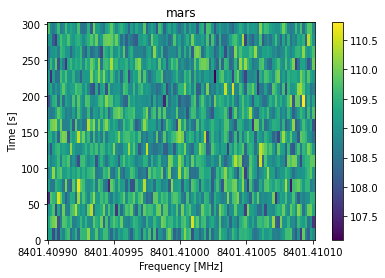

In [20]:
freq = 8401.41
fb.plot_waterfall(f_start=freq-0.0001, f_stop=freq+0.0001)